In [1]:
from os import listdir; from IPython.display import display, HTML; from os.path import isfile, join
import pandas as pd, numpy as np, seaborn as sns, json, csv, os, ast, xml.etree.ElementTree
%matplotlib inline
import json
from matplotlib.backends.backend_pdf import PdfPages
sns.set_style('whitegrid')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20
from collections import Counter

In [2]:
def majority_vote(x):
    c = Counter(x)
    value, count = c.most_common()[0]
    return value

<h3>Distributions</h3>

In [30]:
# Pilot 1
#df = pd.read_csv('../../Task/Pilot/Parsed-results.csv')
# Pilot 2 | S100
#df = pd.read_csv('../../Task/Pilot2/Parsed-results.csv')
# Pilot 2 | S6
# Task | S100
#df = pd.read_csv('../../Task/BigTask/Parsed-results_S100.csv')

# Task | S6
df = pd.read_csv('../../Task/BigTask/Parsed-results_S6.csv')

gold_dict = ['HIGH', 'LOW']

In [6]:
S100rel = df['S100_rel']
#print(S100rel)
count = 0
for i in S100rel:
    if(i%10 == 0):
        count += 1
print("Numero di decine: {}".format(count))
print("Numero Totale: {}".format(len(S100rel)))
print("Ratio: {}".format(round(count / len(S100rel), 3)))


count = 0
for i in S100rel:
    if((i == 0) or (i == 50) or (i == 100)):
        count += 1
print("0, 50 o 100: {}".format(count))
print("Ratio 0, 50 o 100: {}".format(round(count / len(S100rel), 3)))

Numero di decine: 915
Numero Totale: 1597
Ratio: 0.573
0, 50 o 100: 777
Ratio 0, 50 o 100: 0.487


<h3>TOTAL RAW DISTRIBUTION </h3>

c:\users\barbe\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[(-2, 9)]

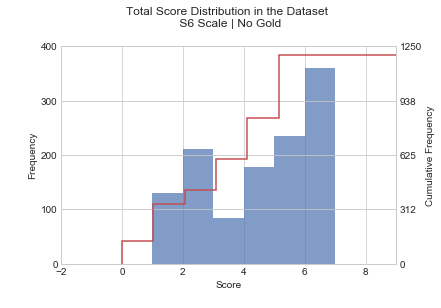

In [44]:
df = df[df["rel"].isin(gold_dict) == False]
#df =  df.dropna()
#df["S100_rel"] = df["S100_rel"].astype(int)

alpha_high = 0.7
offs = 2
n_bins = 101
newBins = np.linspace(0, 100, 101)

# S100
#name = "../../plots/BigTask/Distributions/Raw Distributions/rawDistribution_total_S100.pdf"
# S6
#name = "../../plots/BigTask/Distributions/Raw Distributions/rawDistribution_total_S6.pdf"

#pages = PdfPages(name)

sns.despine (top=False, right = False, left = False, bottom = False)

ax = sns.distplot(df["S6_rel"], kde = False, bins = newBins, norm_hist = False,
             color = sns.color_palette("deep", 8)[0],
             hist_kws = dict(linewidth=1.5, alpha=alpha_high)
            )
ax2 = ax.twinx()
# Cumulative
ax2 =  sns.distplot(df["S6_rel"], kde = False, bins = n_bins, norm_hist = False,
                        hist_kws = dict(cumulative = True, color = sns.color_palette("deep", 8)[2],
                        alpha = 1, histtype='step', linewidth = 1.5,  range = [0, 100 + offs * 2])
                       )
xlimb = 7
ylim_ax1 = (0, 400)
ylim_ax2 = (0, 1250)
xannot = 0.03

ax2.set(ylim =ylim_ax2)
ax.set(ylim = ylim_ax1)
ax.set(xlim= (-1, 8))
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20
from collections import Counter
most_common,num_most_common = Counter(df["S6_rel"]).most_common(1)[0] # 4, 6 times

ax.annotate('{}'.format(num_most_common), xy=(50, 600), xytext=(xannot, 1.01), textcoords='axes fraction')


ax.set_yticks(np.linspace(0, ax.get_ybound()[1]+0,5))
ax2.set_yticks(np.linspace(0, ax2.get_ybound()[1]+0,5))

ax.set(title = 'Total Score Distribution in the Dataset \n S6 Scale | No Gold',
      xlabel='Score',
      ylabel = 'Frequency'
      )
ax2.set(ylabel='Cumulative Frequency')
#ylims
ax2.set(ylim =ylim_ax2)
ax.set(ylim = ylim_ax1)
ax.set(xlim = (-offs, xlimb + offs))

#pages.savefig(bbox_inches='tight');pages.close()


<h3>POLIFACT RAW DISTRIBUTION</h3>

In [7]:
df = pd.read_csv('../../Task/BigTask/Poli_S100.csv')
df = df[df["rel"].isin(gold_dict) == False]
df["S100_rel"] = df["S100_rel"].astype(int)
df =  df.dropna()
S100rel = df['S100_rel']
#print(S100rel)
count = 0
for i in S100rel:
    if(i%10 == 0):
        count += 1
print("Numero di decine: {}".format(count))
print("Numero Totale: {}".format(len(S100rel)))
print("Ratio: {}".format(round(count / len(S100rel), 3)))
count = 0
for i in S100rel:
    if((i == 0) or (i == 50) or (i == 100)):
        count += 1
print("0, 50 o 100: {}".format(count))
print("Ratio 0, 50 o 100: {}".format(round(count / len(S100rel), 3)))
assert False


alpha_high = 0.7
offs = 2
n_bins = 1001
newBins = np.linspace(0, 100, 101)

# S100
#name = "../../plots/BigTask/Distributions/Raw Distributions/total_rawDistribution_S100.pdf"
# S6
name = "../../plots/BigTask/Distributions/Raw Distributions/rawDistribution_polifact_S6.pdf"

pages = PdfPages(name)

sns.despine (top=False, right = False, left = False, bottom = False)

ax = sns.distplot(df["S6_rel"], kde = False, bins = newBins, norm_hist = False,
             color = sns.color_palette("deep", 8)[0],
             hist_kws = dict(linewidth=1.5, alpha=alpha_high)
            )
ax2 = ax.twinx()
# Cumulative
ax2 =  sns.distplot(df["S6_rel"], kde = False, bins = n_bins, norm_hist = False,
                        hist_kws = dict(cumulative = True, color = sns.color_palette("deep", 8)[2],
                        alpha = 1, histtype='step', linewidth = 1.5,  range = [0, 100 + offs * 2])
                       )
xlimb = 7
ylim_ax1 = (0, 300)
ylim_ax2 = (0, 1000)
xannot = 0.03

ax2.set(ylim =ylim_ax2)
ax.set(ylim = ylim_ax1)
ax.set(xlim= (-offs, xlimb+offs))
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20
from collections import Counter
most_common,num_most_common = Counter(df["S6_rel"]).most_common(1)[0] # 4, 6 times

ax.annotate('{}'.format(num_most_common), xy=(50, 600), xytext=(xannot, 1.01), textcoords='axes fraction')


ax.set_yticks(np.linspace(0, ax.get_ybound()[1]+0,5))
ax2.set_yticks(np.linspace(0, ax2.get_ybound()[1]+0,5))

ax.set(title = 'Polifact Score Distribution in the Dataset \n S6 Scale | No Gold',
      xlabel='Score',
      ylabel = 'Frequency'
      )
ax2.set(ylabel='Cumulative Frequency')
#ylims
ax2.set(ylim =ylim_ax2)
ax.set(ylim = ylim_ax1)
ax.set(xlim = (-offs, xlimb + offs))

pages.savefig(bbox_inches='tight');pages.close()

Numero di decine: 454
Numero Totale: 868
Ratio: 0.523
0, 50 o 100: 373
Ratio 0, 50 o 100: 0.43


AssertionError: 

<h3>NOT POLIFACT RAW DISTRIBUTION</h3>

In [8]:
df = pd.read_csv('../../Task/BigTask/Not_Poli_S100.csv')
df = df[df["rel"].isin(gold_dict) == False]
df =  df.dropna()
df["S100_rel"] = df["S100_rel"].astype(int)

alpha_high = 0.7
offs = 2
n_bins = 1001
newBins = np.linspace(0, 100, 101)

# S100
#name = "../../plots/BigTask/Distributions/Raw Distributions/total_rawDistribution_S100.pdf"
# S6
#name = "../../plots/BigTask/Distributions/Raw Distributions/rawDistribution_NOT_polifact_S100.pdf"

pages = PdfPages(name)

sns.despine (top=False, right = False, left = False, bottom = False)

ax = sns.distplot(df["S100_rel"], kde = False, bins = newBins, norm_hist = False,
             color = sns.color_palette("deep", 8)[0],
             hist_kws = dict(linewidth=1.5, alpha=alpha_high)
            )
ax2 = ax.twinx()
# Cumulative
ax2 =  sns.distplot(df["S100_rel"], kde = False, bins = n_bins, norm_hist = False,
                        hist_kws = dict(cumulative = True, color = sns.color_palette("deep", 8)[2],
                        alpha = 1, histtype='step', linewidth = 1.5,  range = [0, 100 + offs * 2])
                       )
xlimb = 101
ylim_ax1 = (0, 50)
ylim_ax2 = (0, 350)
xannot = 0.03

ax2.set(ylim =ylim_ax2)
ax.set(ylim = ylim_ax1)
ax.set(xlim= (-offs, xlimb+offs))
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20
from collections import Counter
most_common,num_most_common = Counter(df["S100_rel"]).most_common(1)[0] # 4, 6 times

ax.annotate('{}'.format(num_most_common), xy=(50, 600), xytext=(xannot, 1.01), textcoords='axes fraction')


ax.set_yticks(np.linspace(0, ax.get_ybound()[1]+0,5))
ax2.set_yticks(np.linspace(0, ax2.get_ybound()[1]+0,5))

ax.set(title = 'Not Polifact Score Distribution in the Dataset \n S100 Scale | No Gold',
      xlabel='Score',
      ylabel = 'Frequency'
      )
ax2.set(ylabel='Cumulative Frequency')
#ylims
ax2.set(ylim =ylim_ax2)
ax.set(ylim = ylim_ax1)
ax.set(xlim = (-offs, xlimb + offs))

#pages.savefig(bbox_inches='tight');pages.close()

Numero di decine: 144
Numero Totale: 328
Ratio: 0.439
0, 50 o 100: 97
Ratio 0, 50 o 100: 0.296


AssertionError: 

<h3>Dati Aggregati</h3>

c:\users\barbe\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[(-2, 9)]

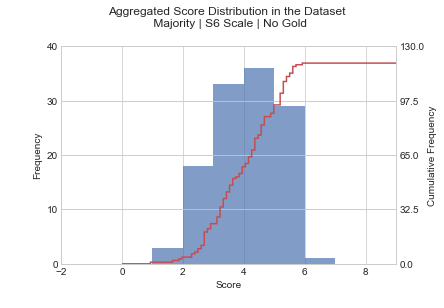

In [18]:
df = pd.read_csv('../../Task/BigTask/Parsed-results_S6.csv')
df = df[df["rel"].isin(gold_dict) == False]
#df["S6_rel"] = df["S100_rel"].astype(int)
#df =  df.dropna()
df = df[["doc_id", "rel", "S6_rel"]]
df= df.replace('LOW', 0).replace('LIE', 1).replace('FALSE', 2).replace('BARELYTRUE', 3).replace('HALFTRUE', 4).replace('MOSTLYTRUE', 5).replace('TRUE', 6).replace('HIGH', 7)
df = df.groupby(['doc_id']).agg(lambda x: majority_vote(x)).reset_index()

alpha_high = 0.7
offs = 2
n_bins = 1001
newBins = np.linspace(0, 100, 101)

# S100
#name = "../../plots/BigTask/Distributions/Raw Distributions/total_rawDistribution_S100.pdf"
# S6
name = "../../plots/BigTask/Distributions/aggDistr_total_S6_majority.pdf"

pages = PdfPages(name)

sns.despine (top=False, right = False, left = False, bottom = False)

ax = sns.distplot(df["S6_rel"], kde = False, bins = newBins, norm_hist = False,
             color = sns.color_palette("deep", 8)[0],
             hist_kws = dict(linewidth=1.5, alpha=alpha_high)
            )
ax2 = ax.twinx()
# Cumulative
ax2 =  sns.distplot(df["S6_rel"], kde = False, bins = n_bins, norm_hist = False,
                        hist_kws = dict(cumulative = True, color = sns.color_palette("deep", 8)[2],
                        alpha = 1, histtype='step', linewidth = 1.5,  range = [0, 100 + offs * 2])
                       )
xlimb = 7
ylim_ax1 = (0, 45)
ylim_ax2 = (0, 200)
xannot = 0.03

ax2.set(ylim =ylim_ax2)
ax.set(ylim = ylim_ax1)
ax.set(xlim= (-offs, xlimb+offs))
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20
from collections import Counter
most_common,num_most_common = Counter(df["S6_rel"]).most_common(1)[0] # 4, 6 times

ax.annotate('{}'.format(num_most_common), xy=(50, 600), xytext=(xannot, 1.01), textcoords='axes fraction')


ax.set_yticks(np.linspace(0, ax.get_ybound()[1]+0,5))
ax2.set_yticks(np.linspace(0, ax2.get_ybound()[1]+0,5))

ax.set(title = 'Aggregated Score Distribution in the Dataset \n Majority | S6 Scale | No Gold',
      xlabel='Score',
      ylabel = 'Frequency'
      )
ax2.set(ylabel='Cumulative Frequency')
#ylims
ax2.set(ylim =ylim_ax2)
ax.set(ylim = ylim_ax1)
ax.set(xlim = (-offs, xlimb + offs))

pages.savefig(bbox_inches='tight');pages.close()

,S6_rel,doc_id,rel
0,1.0,1,1
1,1.7,1,1
2,1.9,1,1
3,2.0,1,1
4,2.3,2,2
5,2.4,1,1
6,2.5,2,2
7,2.6,1,1
8,2.7,1,1
9,2.8,8,8


[1.96457415e-04 2.02603452e-04 2.41827526e-04 3.14931869e-04
 4.25273106e-04 5.78128663e-04 7.80041807e-04 1.03811144e-03
 1.35921658e-03 1.74919655e-03 2.21204295e-03 2.74919134e-03
 3.35902377e-03 4.03669981e-03 4.77441784e-03 5.56216899e-03
 6.38898342e-03 7.24459227e-03 8.12134916e-03 9.01618907e-03
 9.93236490e-03 1.08807053e-02 1.18801876e-02 1.29577117e-02
 1.41470866e-02 1.54873696e-02 1.70208188e-02 1.87907936e-02
 2.08399521e-02 2.32090459e-02 2.59364960e-02 2.90587733e-02
 3.26114320e-02 3.66304827e-02 4.11536792e-02 4.62212559e-02
 5.18757016e-02 5.81602859e-02 6.51162537e-02 7.27788396e-02
 8.11724812e-02 9.03057996e-02 1.00167017e-01 1.10720485e-01
 1.21904871e-01 1.33633346e-01 1.45795819e-01 1.58262950e-01
 1.70891412e-01 1.83529705e-01 1.96023755e-01 2.08221702e-01
 2.19977498e-01 2.31153313e-01 2.41621090e-01 2.51263887e-01
 2.59977728e-01 2.67674646e-01 2.74287231e-01 2.79774583e-01
 2.84129006e-01 2.87382306e-01 2.89610273e-01 2.90933880e-01
 2.91516031e-01 2.915532

c:\users\barbe\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Cumulative Frequency')]

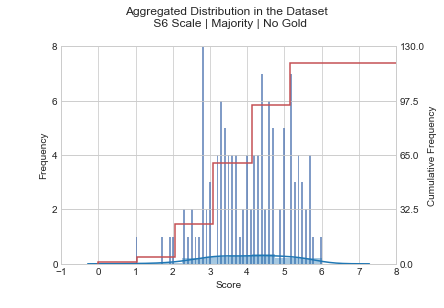

In [81]:
df = pd.read_csv('../../Task/BigTask/Parsed-results_S6.csv')
df = df[df["rel"].isin(gold_dict) == False]

#df =  df.dropna()
#df["S100_rel"] = df["S100_rel"].astype(int)

ddf = df[["doc_id", "rel", "S6_rel"]]
ddf= ddf.replace('LOW', 0).replace('LIE', 1).replace('FALSE', 2).replace('BARELYTRUE', 3).replace('HALFTRUE', 4).replace('MOSTLYTRUE', 5).replace('TRUE', 6).replace('HIGH', 7)
ddf = ddf.groupby(['doc_id']).agg('mean').reset_index()

temp = ddf.groupby(['S6_rel']).count().reset_index()
display(temp)

# S100
#name = "../../plots/BigTask/Distributions/aggDistr_total_S100_mean.pdf"
# S6
#name = "../../plots/BigTask/Distributions/aggDistr_total_S6_majority.pdf"

#pages = PdfPages(name)

alpha_high = 0.7
offs = 2
n_bins = 101
newBins = np.linspace(0, 100, 101)
 # NOT Cumulative
ax =  sns.distplot (ddf["S6_rel"], kde = False, bins = n_bins, norm_hist = False,
                   color=sns.color_palette("deep", 8)[0],
                   hist_kws=dict(linewidth=1.5, alpha=alpha_high)
                   )
temp = sns.distplot(ddf["S6_rel"]).get_lines()[0].get_data()
print(temp[1])
ax2 = ax.twinx()
# Cumulative
ax2 =  sns.distplot(ddf["S6_rel"], kde=False, bins=n_bins, norm_hist = False,
                    hist_kws=dict(cumulative=True, color=sns.color_palette("deep", 8)[2],
                                  alpha=1, histtype='step', linewidth= 1.5,  range=[0,100+offs*2]
                                 )
                   )
xlimb = 7
ylim_ax1 = (0, 8)
ylim_ax2 = (0, 130)
xannot = 0.03


ax2.set(ylim = ylim_ax2)
ax.set(ylim = ylim_ax1)
ax.set(xlim= (-1, 8))

most_common,num_most_common = Counter(ddf["S6_rel"]).most_common(1)[0] # 4, 6 times
rcParams['axes.titlepad'] = 20
ax.annotate('{}'.format(num_most_common), xy=(50, 600), xytext=(xannot, 1.01), textcoords='axes fraction')

#ticks
ax.set_yticks(np.linspace(0, ax.get_ybound()[1]+0, 5))
ax2.set_yticks(np.linspace(0, ax2.get_ybound()[1]+0, 5))

sns.despine (top=False,right=False,left=False,bottom=False)
ax.set(title = 'Aggregated Distribution in the Dataset \n S6 Scale | Majority | No Gold',
  xlabel='Score',
  ylabel = 'Frequency'
  )
ax2.set(ylabel='Cumulative Frequency')

#pages.savefig(bbox_inches='tight');pages.close()



<h3>Gold | Raw Scores</h3>

c:\users\barbe\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


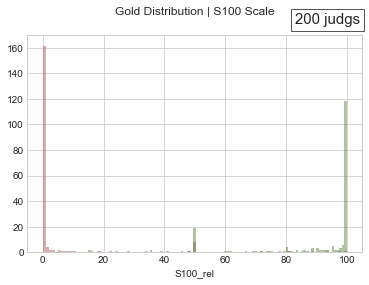

In [87]:
# TOTALE
# S100
df_gold = pd.read_csv('../../Task/BigTask/Parsed-results_S100.csv')
# S6
#df_gold = pd.read_csv('../../Task/BigTask/Parsed-results_S6.csv')

df_gold = df_gold[df_gold["rel"].isin(gold_dict) == True]
df_gold = df_gold[['unit_id', 'doc_id', 'S100_rel' ]]
#df_gold["S100_rel"] = df_gold["S100_rel"].astype(int)

df_low = df_gold.loc[df_gold['doc_id'] == 'LOW']
df_high = df_gold.loc[df_gold['doc_id'] == 'HIGH']

# S100
#pages = PdfPages("../../plots/BigTask/Distributions/goldDistr_S100.pdf")
# S6
pages = PdfPages("../../plots/BigTask/Distributions/goldDistr_S100.pdf")

ax = sns.distplot(df_low['S100_rel'], kde = False, bins = 101, color = "#A7383D", norm_hist = False, hist = True)
ax2 = sns.distplot(df_high['S100_rel'], kde = False, bins = 101, color = "#336F12", norm_hist = False, hist = True)

ylim = 170
ax.set(title = "Gold Distribution | S100 Scale",
    ylim = (0, ylim))
ax.annotate ("{} judgs".format(len(df_low['S100_rel'])), xy=(0, 0),  bbox=dict(lw = 1, ec = "#555555", fc = "white"),
             fontsize=15, xytext=(.8, 1.05), textcoords='axes fraction' ) 
    
sns.despine (top=False,right=False,left=False,bottom=False)

pages.savefig(bbox_inches='tight');pages.close()

In [17]:
# DEM | S100
#party_df = pd.read_csv('../../Task/BigTask/Parsed-results_S100.csv')
# DEM | S6
party_df = pd.read_csv('../../Task/BigTask/Parsed-results_S6.csv')

def get_party(doc_name):
    temp = doc_name.split('_')
    return temp[0]

party_df['party_doc'] = party_df['doc_id']
party_df['party_doc'] = party_df.apply(lambda row: get_party(row.party_doc), axis = 1)

party_df = party_df[party_df["rel"].isin(gold_dict) == False]

party_df = party_df[['doc_id', 'rel', 'S6_rel', 'party_doc']]
#party_df =  party_df.dropna()
#party_df["S100_rel"] = party_df["S100_rel"].astype(int)

dem_df = party_df.loc[party_df['party_doc'] == 'DEM']
rep_df = party_df.loc[party_df['party_doc'] == 'REP']

display(party_df.head())
display(dem_df.head())
display(rep_df.head())


,doc_id,rel,S6_rel,party_doc
0,REP_LIE_doc6,LIE,1,REP
1,DEM_FALSE_doc1,FALSE,1,DEM
3,DEM_HALFTRUE_doc3,HALFTRUE,4,DEM
4,DEM_TRUE_doc2,TRUE,2,DEM
6,REP_MOSTLYTRUE_doc5,MOSTLYTRUE,5,REP


,doc_id,rel,S6_rel,party_doc
1,DEM_FALSE_doc1,FALSE,1,DEM
3,DEM_HALFTRUE_doc3,HALFTRUE,4,DEM
4,DEM_TRUE_doc2,TRUE,2,DEM
11,DEM_BARELYTRUE_doc9,BARELYTRUE,5,DEM
13,DEM_MOSTLYTRUE_doc3,MOSTLYTRUE,6,DEM


,doc_id,rel,S6_rel,party_doc
0,REP_LIE_doc6,LIE,1,REP
6,REP_MOSTLYTRUE_doc5,MOSTLYTRUE,5,REP
7,REP_BARELYTRUE_doc4,BARELYTRUE,4,REP
8,REP_TRUE_doc8,TRUE,5,REP
10,REP_FALSE_doc2,FALSE,6,REP


c:\users\barbe\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


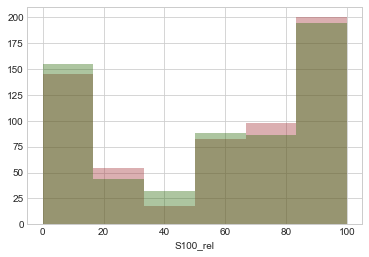

In [65]:
# BOTH PAIRED
# S100
#pages = PdfPages("../../plots/BigTask/Distributions/rawSplitDistr_S100.pdf")
# S6
pages = PdfPages("../../plots/Pilot2/Distributions/rawSplitDistr_S6.pdf")

ax = sns.distplot(dem_df['S100_rel'], kde = False, color = "#A7383D", norm_hist = False, hist = True)
ax2 = sns.distplot(rep_df['S100_rel'], kde = False, color = "#336F12", norm_hist = False, hist = True)
pages.savefig(bbox_inches='tight');pages.close()

In [11]:
# S100
#df = pd.read_csv('../../Task/Pilot2/Parsed-results.csv')
# S6
df = pd.read_csv('../../Task/Pilot2/Parsed-results_S6.csv')

df = df[['doc', 'party_ln', 'judgments', 'expert']]
df = df[df["expert"].isin(gold_dict) == False]
df = df.replace('LIE', 0).replace('FALSE', 1).replace('BARELYTRUE', 2).replace('HALFTRUE', 3).replace('MOSTLYTRUE', 4).replace('TRUE', 5)


def party_ln_replace(n):
    if (n == 1):
        return 'REP'
    if(n == 2):
        return 'DEM'
    
def get_party(doc_name):
    temp = doc_name.split('_')
    return temp[0]
    
df['worker_party'] = df.apply(lambda row: party_ln_replace(row.party_ln), axis = 1)

df['party_doc'] = df['doc']
df['party_doc'] = df.apply(lambda row: get_party(row.party_doc), axis = 1)
display(df.head())

dem_df = df.loc[df['worker_party'] == 'DEM']
rep_df = df.loc[df['worker_party'] == 'REP']

display(dem_df.head())
display(rep_df.head())

,doc,party_ln,judgments,expert,worker_party,party_doc
0,REP_LIE_doc3,1,1,0,REP,REP
1,DEM_TRUE_doc2,1,1,5,REP,DEM
4,DEM_HALFTRUE_doc2,1,4,3,REP,DEM
5,DEM_MOSTLYTRUE_doc3,1,5,4,REP,DEM
6,REP_FALSE_doc2,1,2,1,REP,REP


,doc,party_ln,judgments,expert,worker_party,party_doc
24,DEM_HALFTRUE_doc2,2,5,3,DEM,DEM
25,REP_FALSE_doc2,2,2,1,DEM,REP
26,REP_BARELYTRUE_doc3,2,2,2,DEM,REP
27,DEM_TRUE_doc2,2,3,5,DEM,DEM
28,DEM_MOSTLYTRUE_doc3,2,6,4,DEM,DEM


,doc,party_ln,judgments,expert,worker_party,party_doc
0,REP_LIE_doc3,1,1,0,REP,REP
1,DEM_TRUE_doc2,1,1,5,REP,DEM
4,DEM_HALFTRUE_doc2,1,4,3,REP,DEM
5,DEM_MOSTLYTRUE_doc3,1,5,4,REP,DEM
6,REP_FALSE_doc2,1,2,1,REP,REP
